In [294]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn.datasets as datasets
from sklearn.decomposition import PCA
from sklearn.metrics import adjusted_rand_score
from sklearn.cluster import KMeans, DBSCAN

In [295]:
x, y = datasets.load_iris(return_X_y=True, as_frame=True)
print(x)
print(y)

     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                  5.1               3.5                1.4               0.2
1                  4.9               3.0                1.4               0.2
2                  4.7               3.2                1.3               0.2
3                  4.6               3.1                1.5               0.2
4                  5.0               3.6                1.4               0.2
..                 ...               ...                ...               ...
145                6.7               3.0                5.2               2.3
146                6.3               2.5                5.0               1.9
147                6.5               3.0                5.2               2.0
148                6.2               3.4                5.4               2.3
149                5.9               3.0                5.1               1.8

[150 rows x 4 columns]
0      0
1      0
2      0
3      0
4   

In [296]:
def perform_pca_projection(x, n_components=2):
    return PCA(n_components=n_components).fit_transform(X=x)

def scatter(title, projection, target):
    plt.title(title)
    plt.scatter(x=projection[:, 0], y=projection[:, 1], c=target)
    plt.show()

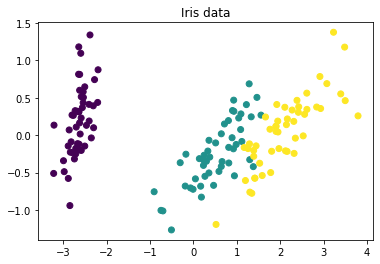

In [297]:
scatter("Iris data", perform_pca_projection(x), y)

In [298]:
def calc_mean_by_cluster(x, y):
    (n, m) = np.shape(x)
    assert np.shape(y) == (n,), 'Unexpected target shape: {}'.format(np.shape(y))
    mean_by_cluster = {}
    cnt_by_cluster = {}
    mean_all = np.zeros(m)
    for i in range(n):
        if y[i] not in mean_by_cluster:
            mean_by_cluster[y[i]] = np.zeros(m)
            cnt_by_cluster[y[i]] = 0
        mean_all += x[i]
        mean_by_cluster[y[i]] += x[i]
        cnt_by_cluster[y[i]] += 1
    return mean_by_cluster, cnt_by_cluster, mean_all

def dist_squared(a, b):
    m = len(a)
    assert len(b) == m, 'Inconsistent vectors lengths: {}'.format(m, len(b))
    r = 0.0
    for i in range(m):
        r += (a[i] - b[i]) ** 2
    return r

def compute_cluster_separation(x, y):
    mean_by_cluster, cnt_by_cluster, mean_all = calc_mean_by_cluster(x, y)
    score = 0.0
    for clust in np.unique(y):
        score += dist_squared(mean_by_cluster[clust] / cnt_by_cluster[clust], mean_all)
    return score

def compute_cluster_cohession(x, y):
    mean_by_cluster, cnt_by_cluster, _ = calc_mean_by_cluster(x, y)
    score = 0.0
    for i in range(len(x)):
        score += dist_squared(mean_by_cluster[y[i]] / cnt_by_cluster[y[i]], x[i])
    return score

In [299]:
def clusterize(x, y, model_by_param, params, case_title):
    predictions = []
    separation_scores = []
    cohession_scores = []
    adjusted_rand_scores = []

    for param in params:
        model = model_by_param(param)
        predictions.append(model.fit(x).labels_)
        separation_scores.append(compute_cluster_separation(x, predictions[-1]))
        cohession_scores.append(compute_cluster_cohession(x, predictions[-1]))
        adjusted_rand_scores.append(adjusted_rand_score(y, predictions[-1]))

    plt.title('{}: Cluster separation scores'.format(case_title))
    plt.plot(params, separation_scores)
    plt.show()
    plt.title('{}: Cluster cohession scores'.format(case_title))
    plt.plot(params, cohession_scores)
    plt.show()
    plt.title('{}: Adjusted rand scores'.format(case_title))
    plt.plot(params, adjusted_rand_scores)
    plt.show()
    separation_argmax = np.asarray(separation_scores).argmax()
    print('{}: best param is {}'.format(case_title, params[separation_argmax]))
    scatter(
        '{}: best clusterisation by cluster separation'.format(case_title),
        perform_pca_projection(x),
        predictions[separation_argmax]
    )
    cohession_argmin = np.asarray(cohession_scores).argmin()
    print('{}: best param is {}'.format(case_title, params[cohession_argmin]))
    scatter(
        '{}: best clusterisation by cluster cohession'.format(case_title),
        perform_pca_projection(x),
        predictions[cohession_argmin]
    )
    adjusted_rand_argmax = np.asarray(adjusted_rand_scores).argmax()
    print('{}: best param is {}'.format(case_title, params[adjusted_rand_argmax]))
    scatter(
        '{}: best clusterisation by adjusted rand'.format(case_title),
        perform_pca_projection(x),
        predictions[adjusted_rand_argmax]
    )

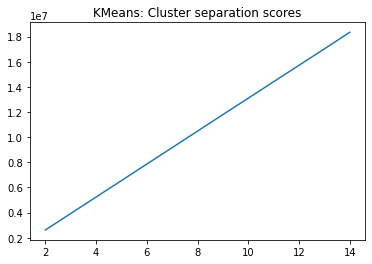

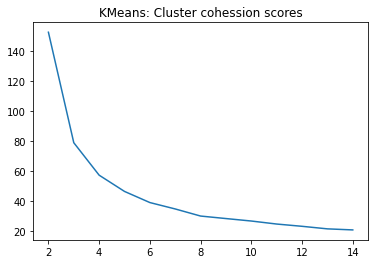

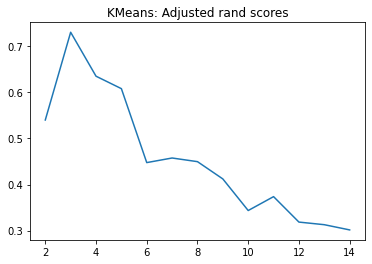

KMeans: best param is 14


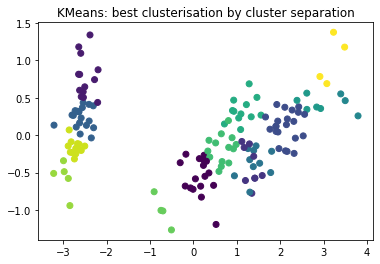

KMeans: best param is 14


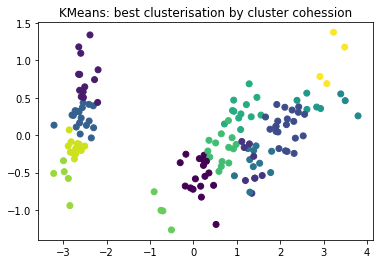

KMeans: best param is 3


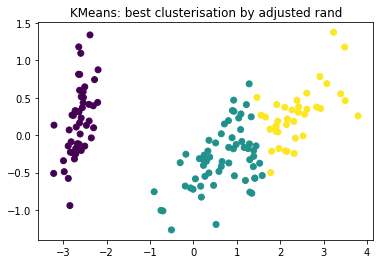

In [300]:
clusterize(x.values, y.values, lambda t: KMeans(n_clusters=t, n_init=5), [*range(2, 15)], 'KMeans')

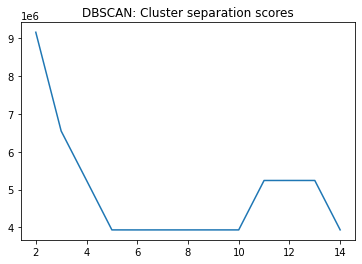

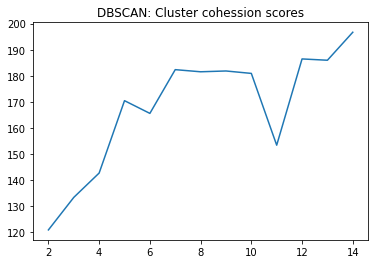

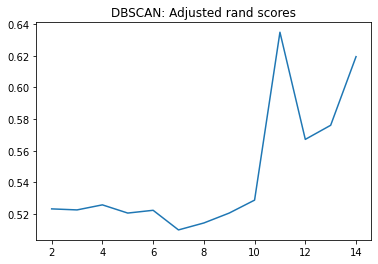

DBSCAN: best param is 2


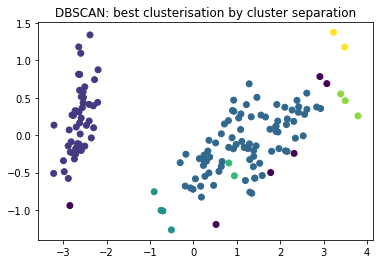

DBSCAN: best param is 2


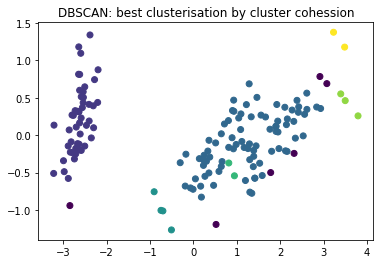

DBSCAN: best param is 11


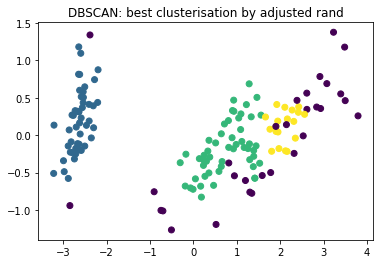

In [301]:
clusterize(x.values, y.values, lambda t: DBSCAN(min_samples=t), [*range(2, 15)], 'DBSCAN')